Face Mask Detection Dataset

In [1]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:02<00:00, 79.0MB/s]
100% 163M/163M [00:02<00:00, 81.3MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Libraries

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_884.jpg', 'with_mask_1860.jpg', 'with_mask_1101.jpg', 'with_mask_1112.jpg', 'with_mask_1076.jpg']
['with_mask_3395.jpg', 'with_mask_857.jpg', 'with_mask_63.jpg', 'with_mask_976.jpg', 'with_mask_2138.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3035.jpg', 'without_mask_2448.jpg', 'without_mask_1885.jpg', 'without_mask_448.jpg', 'without_mask_1119.jpg']
['without_mask_2623.jpg', 'without_mask_1099.jpg', 'without_mask_2284.jpg', 'without_mask_2036.jpg', 'without_mask_1492.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


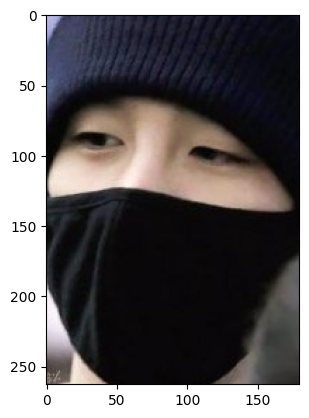

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_113.jpg')
imgplot = plt.imshow(img)
plt.show()

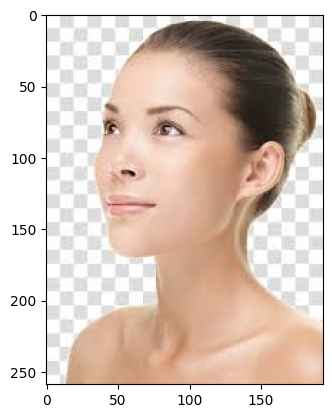

In [24]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [25]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
type(data)

list

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)
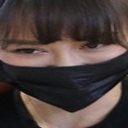

In [27]:
data[0]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[205, 194, 188],
        [205, 194, 188],
        [206, 195, 189],
        ...,
        [220, 204, 205],
        [217, 201, 202],
        [214, 198, 196]],

       [[205, 194, 188],
        [205, 194, 188],
        [206, 195, 189],
        ...,
        [221, 205, 205],
        [218, 202, 202],
        [215, 199, 197]],

       [[205, 194, 188],
        [205, 194, 188],
        [206, 195, 189],
        ...,
        [221, 205, 206],
        [219, 203, 203],
        [216, 200, 198]],

       ...,

       [[ 39,  28,  31],
        [ 38,  27,  31],
        [ 37,  26,  30],
        ...,
        [ 31,  17,  23],
        [ 29,  17,  25],
        [ 28,  19,  24]],

       [[ 37,  26,  32],
        [ 37,  26,  32],
        [ 37,  26,  30],
        ...,
        [ 31,  17,  27],
        [ 29,  17,  28],
        [ 28,  17,  25]],

       [[ 37,  26,  34],
        [ 37,  26,  33],
        [ 37,  26,  30],
        ...,
        [ 31,  18,  31],
        [ 29,  17,  32],
        [ 28,  14,  25]]], dtype=uint8)
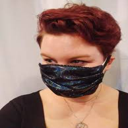

In [36]:
X_train[0]

In [37]:
X_train_scaled[0]

array([[[0.80392157, 0.76078431, 0.7372549 ],
        [0.80392157, 0.76078431, 0.7372549 ],
        [0.80784314, 0.76470588, 0.74117647],
        ...,
        [0.8627451 , 0.8       , 0.80392157],
        [0.85098039, 0.78823529, 0.79215686],
        [0.83921569, 0.77647059, 0.76862745]],

       [[0.80392157, 0.76078431, 0.7372549 ],
        [0.80392157, 0.76078431, 0.7372549 ],
        [0.80784314, 0.76470588, 0.74117647],
        ...,
        [0.86666667, 0.80392157, 0.80392157],
        [0.85490196, 0.79215686, 0.79215686],
        [0.84313725, 0.78039216, 0.77254902]],

       [[0.80392157, 0.76078431, 0.7372549 ],
        [0.80392157, 0.76078431, 0.7372549 ],
        [0.80784314, 0.76470588, 0.74117647],
        ...,
        [0.86666667, 0.80392157, 0.80784314],
        [0.85882353, 0.79607843, 0.79607843],
        [0.84705882, 0.78431373, 0.77647059]],

       ...,

       [[0.15294118, 0.10980392, 0.12156863],
        [0.14901961, 0.10588235, 0.12156863],
        [0.14509804, 0

Building a Convolutional Neural Networks (CNN)

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.4869 - acc: 0.7949 - val_loss: 0.2622 - val_acc: 0.8926
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2872 - acc: 0.8852 - val_loss: 0.2560 - val_acc: 0.8810
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2425 - acc: 0.9095 - val_loss: 0.2347 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1993 - acc: 0.9296 - val_loss: 0.2251 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1721 - acc: 0.9327 - val_loss: 0.2058 - val_acc: 0.9355


Model Evaluation

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 17ms/step - loss: 0.1899 - acc: 0.9325
Test Accuracy = 0.9324950575828552


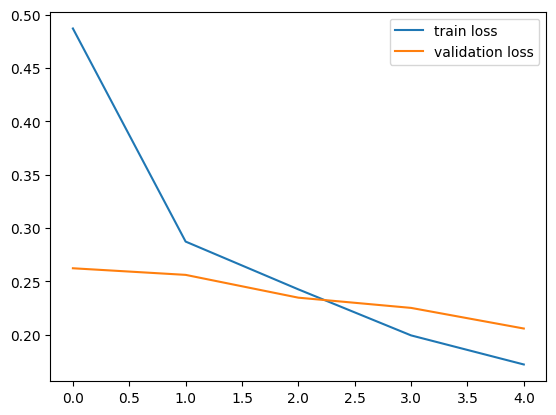

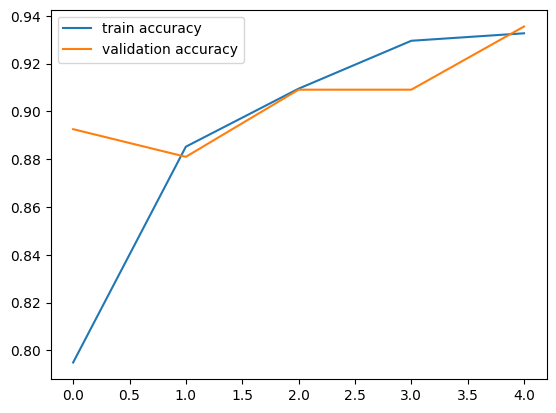

In [43]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/download.jpg


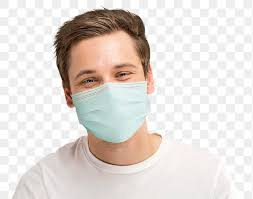

1/1 [==============================] - 0s 481ms/step
[[0.49033746 0.49534908]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')